# Tennis Results Prediction - Can the Outcome of a Match Be Deduced From its Statistics?

This project is special to me, as it was the first Data Science project I ever did!

As a huge fan of **tennis**, I wanted to delve into statistics related to this sport and see what I could do with them. I got to the point where I wanted to see if the **outcome of a match could be deduced from its statistics**. And if so, what are the **most important statistics**?

I had an intuition that certain statistics were very strongly linked to the outcome of a match, but I wanted to investigate. 

The dataset I worked on contains data on **all matches on the men's professional circuit between 2000 and 2017**. The statistics in this dataset are a good material to feed our analysis, although some interesting metrics are missing, starting with the number of points won by each player.

### Prerequisites

I downloaded the data regarding this project on [Kaggle](https://www.kaggle.com/gmadevs/atp-matches-dataset). However, as you can see if you follow the link, it is split between **18 documents**, one for each year.

I merged them manually and removed  from the data some matches for which statistics where absent, as well as those related to team competitions, due to their particular format.

At the end of the day, the 18 documents containing a total of 53,249 lines had been replaced by a **single csv file of 46,115 lines**. The latter is available in the same folder as this notebook.

Please keep in mind that all of the following is based on this preprocessed dataset. That doesn't prevent you to work from the original files, of course, but this would require some adjustments (especially for the import part, obviously).

Concerning libraries, as you can see in the cell below, we use a few **libraries** that you may have to install if you haven't already done it. The six libraries needed in this project are **Pandas** and **NumPy** for data manipulation, **Matplotlib**, **Squarify** and **Seaborn** for data visualization, and **sklearn** for machine learning.

### Preprocessing

#### Importing the libraries and the dataset

In [1]:
# If one of these libraries isn't installed on your environment, you can do so
# through a 'pip install name_of_the_library' command (in a terminal or in a notebook).
# In a notebook, you must precede the command with an exclamation mark.

# Data manipulation

import pandas as pd
import numpy as np

# Data visualization

import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import sklearn.naive_bayes as nb

In [2]:
# Importing the dataset, which as a reminder is a modified version 
# of the one available on Kaggle (see the Prerequisites part above).

dataset = pd.read_csv("atp_matches_aggregate.csv")

In [3]:
# Printing the number of rows and columns

dataset.shape

(46115, 49)

In [4]:
# Displaying the first 5 lines in order to have an overview of the data

dataset.head()

,year,tournament_id,tournament_name,surface,draw_size,tournament_level,tourney_date,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000,2000-717,Orlando,Clay,32,A,20000501,102179,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000,2000-717,Orlando,Clay,32,A,20000501,103602,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000,2000-717,Orlando,Clay,32,A,20000501,103387,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000,2000-717,Orlando,Clay,32,A,20000501,101733,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000,2000-717,Orlando,Clay,32,A,20000501,101727,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [5]:
# Displaying the list of columns

dataset.columns

Index(['year', 'tournament_id', 'tournament_name', 'surface', 'draw_size',
       'tournament_level', 'tourney_date', 'winner_id', 'winner_seed',
       'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'winner_rank', 'winner_rank_points', 'loser_id',
       'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht',
       'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'score',
       'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',
       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced'],
      dtype='object')

#### Cleaning the data

##### Selecting relevant columns

As we have quite a lot of columns, we should first try to identify which ones we want to **keep or exclude**.

We have to keep in mind that we want to do some **data exploration/visualization**, as well as some **machine learning** on the statistics specifically. So any column that wouldn't prove useful to one of these purposes has to be removed.

Let's review them **one by one**:
- **year**: year of the game, could be useful for visualizations over time -> **kept**
- **tournament_id**: id of the tournament, won't be of any use -> **removed**
- **tournament_name**: name of the tournament, doesn't seem usable -> **removed**
- **surface**: surface of the court, can be interesting for visualizations -> **kept** 
- **draw_size**: size of the draw of the tournament, uninteresting -> **removed**
- **tournament_level**: category of the tournament, why not -> **kept** 
- **tourney_date**: date of the tournament, won't be useful -> **removed**
- **winner_id**/**loser_id**: id of the players, useless -> **removed**
- **winner_seed**/**loser_seed**: seed of the players in the tournament, not really useful as we have the rankings as well (see below) -> **removed** 
- **winner_entry**/**loser_entry**: way used by the player to enter the tournament, useless -> **removed**
- **winner_name**/**loser_name**: name of the players, worth a visualization -> **kept** 
- **winner_hand**/**loser_hand**: laterality of the players, could be nice to plot -> **kept** 
- **winner_ht**/**loser_ht**: height of the players, could be interesting -> **kept** 
- **winner_ioc**/**loser_ioc**: nationality of the players, can be plotted on a map -> **kept**
- **winner_age**/**loser_age**: age of the players, can make an interesting graph -> **kept** 
- **winner_rank**/**loser_rank**: ranking of the players, might be usable -> **kept**
- **winner_rank_points**/**loser_rank_points**: useless, the rankings are more meaningful -> **removed** 
- **score**: score of the match, won't be used in machine learning as it is equivalent to the target variable -> **removed** 
- **best_of**: number of sets of the game, not really interesting -> **removed** 
- **round**: round of the tournament, useless for our analysis -> **removed** 
- **minutes**: length of the match, useless as well -> **removed**
- **w_ace**/**l_ace**: number of aces (services unreturned) of the players, our first match statistic -> **kept**
- **w_df**/**l_df**: number of double faults (faults on service) of the players, interesting as well -> **kept**
- **w_svpt**/**l_svpt**: number of service points played by the player, will need to be processed -> **kept**
- **w_1stIn**/**l_1stIn**: number of services valid at the first attempt, usable after some engineering -> **kept**
- **w_1stWon**/**l_1stWon**: number of points won after a service valid at the first attempt, interesting but once again will have to be reworked -> **kept**
- **w_2ndWon**/**l_2ndWon**: number of points won after a service valid at the second attempt, to be processed -> **kept**
- **w_SvGms**/**l_SvGms**: number of service games played by each players, not really meaningful -> **removed**
- **w_bpSaved**/**l_bpSaved**: number of break points (game points for the opponent on a player's serve) saved by the players, interesting -> **kept**
- **w_bpFaced**/**l_bpFaced**: number of break points faced by the players, will be useful when connected with the number of break points saved -> **kept**

All in all, many columns can be removed. Concerning the statistics, it's obvious that some of them will have to be processed to become of interest for our project, but we'll come back to it!

In [6]:
# List of the columns to be removed

removed_col = ["tournament_id", "tournament_name", "draw_size", "tourney_date", "winner_id", 
               "loser_id", "winner_seed", "loser_seed", "winner_entry", "loser_entry", "winner_rank_points", 
               "loser_rank_points", "score", "best_of", "round", "minutes", "w_SvGms", "l_SvGms"]

In [7]:
# Implementing the removal, and displaying the new number of columns

print("Number of columns before removing useless or unusable variables: {}".format(dataset.shape[1]))
dataset = dataset.drop(removed_col, axis = 1)
print("Number of columns after removing useless or unusable variables: {}".format(dataset.shape[1]))
print("Awesome, our cleaning helped us getting rid of {} columns!".format(len(removed_col)))

Number of columns before removing useless or unusable variables: 49
Number of columns after removing useless or unusable variables: 31
Awesome, our cleaning helped us getting rid of 18 columns!


##### Dealing with missing values

In [8]:
# Getting the percentage of missing values for each column

percent_missing = 100 * (dataset.isnull().sum() / len(dataset))
percent_missing.sort_values(ascending = False)

loser_ht            5.726987
winner_ht           3.124797
loser_rank          1.470237
winner_rank         1.279410
l_bpFaced           0.598504
w_1stWon            0.598504
l_bpSaved           0.598504
w_df                0.598504
w_svpt              0.598504
w_1stIn             0.598504
w_ace               0.598504
w_2ndWon            0.598504
l_2ndWon            0.598504
w_bpFaced           0.598504
l_ace               0.598504
l_df                0.598504
l_svpt              0.598504
l_1stIn             0.598504
w_bpSaved           0.598504
l_1stWon            0.598504
loser_age           0.004337
surface             0.000000
tournament_level    0.000000
winner_name         0.000000
winner_hand         0.000000
loser_name          0.000000
winner_ioc          0.000000
winner_age          0.000000
loser_hand          0.000000
loser_ioc           0.000000
year                0.000000
dtype: float64

We don't have a lot of missing values in the columns we kept. For the **height and age of the players**, we will just **replace them by "Unknown"**. We don't have to either remove them or replacing them by the median or the mean, as we won't need them for the machine learning. Upon doing some visualization, we will filter out the dataset in order to exclude these values.

Missing data concerning **rankings** probably means the player is **unranked**, we will follow the same reasoning as for heights and ages.

When it comes to **match statistics** themselves, which will be essential for the machine learning section, the low proportion of missing values makes me think that **removing the corresponding lines is a better option** than replacing them, as the latter would introduce a bias. Moreover, the fact that all the statistics have the **same percentage of missing values** seems to indicate that they aren't scattered across the dataset. The most logical explanation is that some matches simply don't have any statistics, and are thus useless for our project. The good news being that we won't lose more than what is indicated in our table, i.e. less than 0.6% of our data!

Let's apply all these modifications.

In [9]:
# Replacing missing values for the height, age and rankings columns

dataset[["loser_ht", "winner_ht", "loser_age"]] = dataset[["loser_ht", "winner_ht", "loser_age"]].fillna("Unknown")
dataset[["loser_rank", "winner_rank"]] = dataset[["loser_rank", "winner_rank"]].fillna("Unranked")

In [10]:
# Removing lines with missing statistics
# We can use the 'dropna' method without specifying the columns only because 
# statistics columns are the only ones for which some missing values remain.

nr_lines_previous = dataset.shape[0]
dataset = dataset.dropna()
loss_percentage = round(abs((dataset.shape[0] - nr_lines_previous) / nr_lines_previous * 100), 3)
print("Removing missing statistics made us delete {}% of the dataset.".format(loss_percentage))

Removing missing statistics made us delete 0.599% of the dataset.


Great, that's exactly what we expected! As a sanity check, let's verify we don't have any missing value left.

In [11]:
dataset.isnull().sum().sum()

0

Perfect, now it's time to move on to the **exploratory part**!

### Data Exploration

First, let's have a first glimpse of information through the very useful `describe` function of Pandas.

In [12]:
# The 'set_option' method is there to change the number of columns appearing
# in the display, which is limited by default.

pd.set_option("display.max_columns", None)
dataset.describe(include = "all")

,year,surface,tournament_level,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
count,45839.000000,45839,45839,45839,45839,45839.0,45839,45839.000000,45839.0,45839,45839,45839.0,45839,45839.000000,45839,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000,45839.000000
unique,NaN,4,4,803,3,22.0,73,NaN,579.0,1246,3,22.0,84,6494.000000,916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hard,A,Roger Federer,R,185.0,ESP,NaN,1.0,Feliciano Lopez,R,183.0,ESP,26.097194,Unranked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24491,27914,1007,40264,7680.0,6520,NaN,1051.0,366,39518,7100.0,5631,25.000000,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.844717,NaN,NaN,NaN,NaN,NaN,NaN,26.175430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.911124,2.660900,78.385196,47.851066,36.192740,16.938219,3.501713,5.094897,5.071249,3.411135,81.372848,48.391544,32.239229,15.189489,4.808373,8.713585
std,4.933306,NaN,NaN,NaN,NaN,NaN,NaN,3.609575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.488923,2.273929,28.426403,18.387922,13.136227,6.948316,3.074421,4.022503,4.788213,2.527271,28.441070,18.756544,14.059984,7.184780,3.248895,4.093204
min,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.824778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,10.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,23.548255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,57.000000,34.000000,27.000000,12.000000,1.000000,2.000000,2.000000,2.000000,60.000000,35.000000,22.000000,10.000000,2.000000,6.000000
50%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.080767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.000000,73.000000,44.000000,34.000000,16.000000,3.000000,4.000000,4.000000,3.000000,76.000000,45.000000,30.000000,14.000000,4.000000,8.000000
75%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,28.654346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,4.000000,94.000000,58.000000,43.000000,21.000000,5.000000,7.000000,7.000000,5.000000,97.000000,58.000000,40.000000,19.000000,7.000000,11.000000


OK, that gives us some interesting insights, but don't you think this table is kind of hard to read? Let's display some elements more visually.

Before that, there's something we should try to investigate. If we focus on the `w_svpt` column, we can see that we have a maximum of **491 points** played. That's huge, far more than the mean of 78 points. This is definitely an **outlier**. Let's see if there are more.

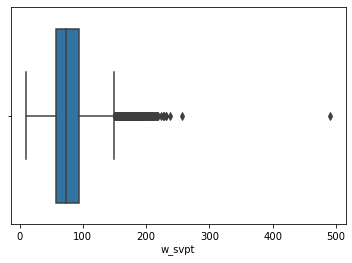

In [13]:
# Displaying a box plot of the "w_svpt" column

sns.boxplot(dataset["w_svpt"])
plt.show()

In [14]:
# Showing the top 10 outliers

dataset.sort_values(by = "w_svpt", ascending = False).head(10)

,year,surface,tournament_level,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
28166,2010,Grass,G,John Isner,R,206,USA,25.152635,19,Nicolas Mahut,R,190,FRA,28.4134,148,113.0,10.0,491.0,361.0,292.0,82.0,2.0,3.0,103.0,21.0,489.0,328.0,284.0,101.0,12.0,14.0
39204,2014,Hard,G,Gilles Simon,R,183,FRA,29.045859,19,Daniel Brands,R,196,GER,26.4942,59,32.0,17.0,257.0,143.0,114.0,57.0,23.0,25.0,41.0,4.0,204.0,128.0,108.0,37.0,6.0,10.0
21955,2007,Hard,G,Lukas Dlouhy,R,185,CZE,23.770021,99,Teymuraz Gabashvili,R,188,RUS,21.6482,113,17.0,8.0,237.0,150.0,110.0,36.0,9.0,17.0,13.0,11.0,253.0,145.0,96.0,47.0,12.0,25.0
9430,2003,Hard,G,Andy Roddick,R,188,USA,20.372348,10,Younes El Aynaoui,R,193,MAR,31.3374,22,27.0,2.0,231.0,143.0,114.0,61.0,6.0,9.0,25.0,8.0,253.0,179.0,141.0,37.0,10.0,13.0
29690,2010,Clay,G,Lukas Lacko,R,185,SVK,22.554415,81,Michael Yani,R,185,USA,29.3936,151,23.0,6.0,231.0,131.0,104.0,58.0,14.0,15.0,17.0,10.0,252.0,157.0,116.0,54.0,12.0,13.0
12908,2004,Clay,G,Fabrice Santoro,R,178,FRA,31.455168,58,Arnaud Clement,R,173,FRA,26.4339,33,22.0,2.0,229.0,108.0,77.0,60.0,13.0,22.0,10.0,9.0,234.0,121.0,84.0,52.0,17.0,27.0
34208,2012,Grass,G,Marin Cilic,R,198,CRO,23.739904,18,Sam Querrey,R,198,USA,24.7173,64,14.0,6.0,226.0,138.0,104.0,56.0,5.0,8.0,23.0,9.0,273.0,172.0,132.0,47.0,11.0,16.0
1249,2000,Grass,G,Mark Philippoussis,R,196,AUS,23.633128,18,Sjeng Schalken,R,193,NED,23.7974,53,38.0,14.0,224.0,128.0,113.0,61.0,2.0,4.0,26.0,18.0,248.0,147.0,120.0,55.0,10.0,13.0
23443,2008,Grass,G,Rafael Nadal,L,185,ESP,22.056126,2,Roger Federer,R,185,SUI,26.8747,1,6.0,3.0,218.0,160.0,111.0,34.0,12.0,13.0,25.0,2.0,195.0,127.0,92.0,39.0,9.0,13.0
18885,2006,Hard,G,Alex Bogomolov Jr,R,178,RUS,22.735113,202,Fernando Gonzalez,R,183,CHI,25.4675,12,7.0,10.0,217.0,154.0,98.0,25.0,14.0,22.0,10.0,14.0,178.0,98.0,70.0,36.0,4.0,13.0


OK, this 491 maximum corresponds to the **Isner - Mahut match**, well-known for being the **longest match in tennis history**. This was a crazy match, defying common sense, which spanned over three days and more than 11 hours of playing.

We should **remove this line**. It won't be problematic for visualization, but our machine learning models won't like it. 

The following values are beyond the usual scope, but they seem close enough to be kept.

In [15]:
dataset = dataset.drop(28166).reset_index(drop = True)

#### Most successful players

In [16]:
# We first create a Pandas Series containing the number of wins per player.
# Then, we filter it to select only players with more than 400 victories.

nr_wins = dataset["winner_name"].value_counts()
most_successful = nr_wins[nr_wins > 400]

In [17]:
# The library we'll be using for this plot initally won't display values, only labels.
# We work around this problem by creating fake labels that contain both the original labels 
# (the players' names) and the value they are associated to (the number of wins).

labels = most_successful.index
values = most_successful.values

new_labels = []

for i in range(len(most_successful)):
    new_label = "{}: {}".format(labels[i], values[i])
    new_labels.append(new_label)

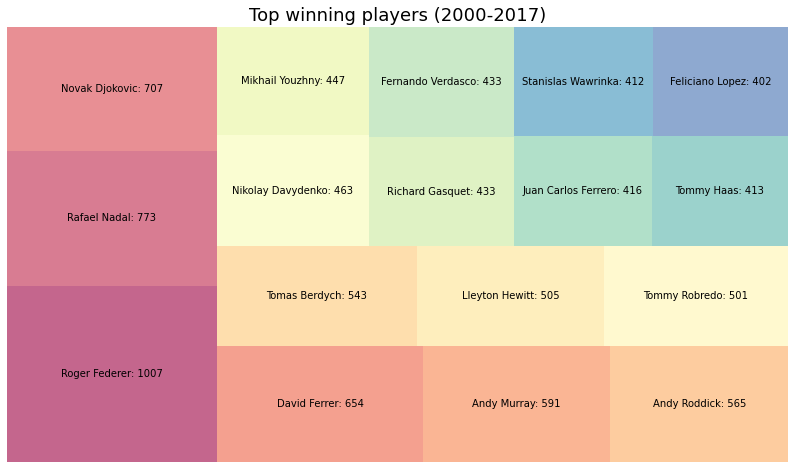

In [18]:
# Creating a custom color range

colors = [plt.cm.Spectral(i / float(len(new_labels))) for i in range(len(new_labels))]

# Plotting the result, using Matplotlib and Squarify (for the algorithm)

plt.figure(figsize = (14, 8))
squarify.plot(sizes = values, label = new_labels, alpha = .6, color = colors)
plt.title("Top winning players (2000-2017)", fontsize = 18)
plt.axis("off")
plt.show()

If you like tennis, you're probably aware of the big debate among fans in order to determine who is the **best player** between **Roger Federer**, **Rafael Nadal** and **Novak Djokovic**.

Does this graph allow us to settle the question? Not really. Even though Federer is way ahead of the other two, we should keep in mind that he is **older** than them and **became professionnal a few years before** (1998 compared to 2001 for Nadal and 2003 for Djokovic). Our data starts in 2000, at a moment when Federer already had some experience on the tour while the other two weren't professional players yet. Thus, we can't really compare their performance as they aren't on an equal footing chronologically speaking.

#### Ranking of the winner

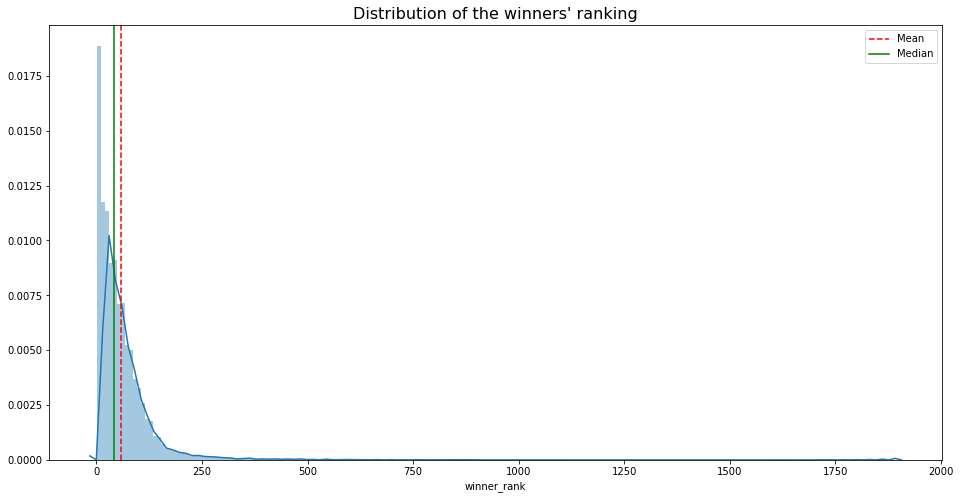

In [19]:
# Selecting only ranked winners

only_ranked = dataset[dataset["winner_rank"] != "Unranked"]

# Calculating the mean and the median of the variable

mean_rank = only_ranked["winner_rank"].mean()
median_rank = only_ranked["winner_rank"].median()

# Setting the size of our graph before creating it

plt.figure(figsize = (16, 8))
sns.distplot(only_ranked["winner_rank"], bins = 200)

# Adding the mean and median reference lines, as well as a legend to identify them

plt.axvline(mean_rank, color = "r", linestyle = "--")
plt.axvline(median_rank, color = "g", linestyle = "-")
plt.legend({"Mean": mean_rank, "Median": median_rank})

plt.title("Distribution of the winners' ranking", fontsize = 16)

# Displaying everything

plt.show()

As one could expect, **the higher your rank, the most likely you are to win the match**.

#### Age of the winner

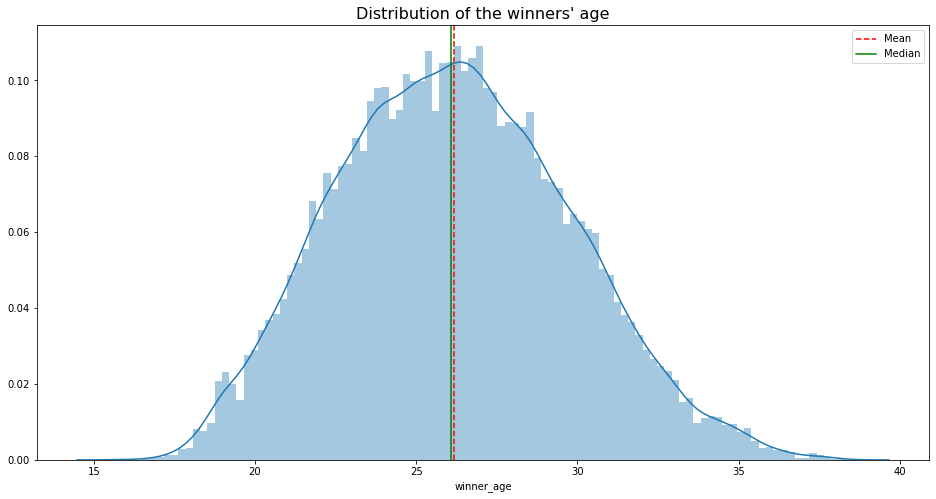

In [20]:
# Same code but for the age...

mean_age = dataset["winner_age"].mean()
median_age = dataset["winner_age"].median()

plt.figure(figsize = (16, 8))
sns.distplot(dataset["winner_age"], bins = 100)

plt.axvline(mean_age, color = "r", linestyle = "--")
plt.axvline(median_age, color = "g", linestyle = "-")
plt.legend({"Mean": mean_age, "Median": median_age})

plt.title("Distribution of the winners' age", fontsize = 16)

plt.show()

This looks approximately like a **normal distribution**, centered around **26** (more or less). It makes sense, as players usually start their career at 20 or so and end it around 35. Being between 24 and 27 may thus represent a **good balance between experience**, which grows over time, and **physical condition**, which on the contrary tends to decline as time goes by.

#### Height of the winner

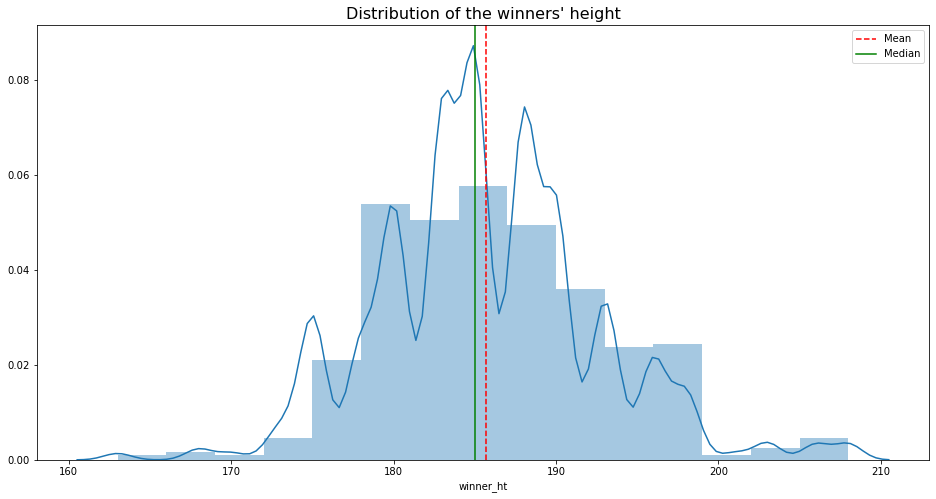

In [21]:
# ... and height of the winners.

only_known_heights = dataset[dataset["winner_ht"] != "Unknown"]

# Calculating the mean and the median of the variable

mean_height = only_known_heights["winner_ht"].mean()
median_height = only_known_heights["winner_ht"].median()

# Setting the size of our graph before creating it

plt.figure(figsize = (16, 8))
sns.distplot(only_known_heights["winner_ht"], bins = 15)

# Adding the mean and median reference lines, as well as a legend to identify them

plt.axvline(mean_height, color = "r", linestyle = "--")
plt.axvline(median_height, color = "g", linestyle = "-")
plt.legend({"Mean": mean_height, "Median": median_height})

plt.title("Distribution of the winners' height", fontsize = 16)

# Displaying everything

plt.show()

Height data is harder to interpret, but it seems that most winners were **between 180 and 190 cm tall**.

#### Nationality of the winner

In [22]:
# Identifying the top 20 countries by number of wins

dataset["winner_ioc"].value_counts()[:20]

ESP    6520
FRA    4660
USA    4059
ARG    3315
GER    2693
RUS    2290
CZE    1742
SUI    1675
CRO    1497
AUS    1459
ITA    1334
SRB    1283
GBR    1181
SWE    1163
BEL     897
AUT     747
CHI     682
NED     664
BRA     649
SVK     547
Name: winner_ioc, dtype: int64

In [23]:
# Creating a new column in the dataset with the full name of the country.
# All the countries that don't belong to the top 20 are gathered in "Others".

dataset["winner_country"] = dataset["winner_ioc"].apply(lambda x: "Spain" if x == "ESP"
                                                        else "France" if x == "FRA"
                                                        else "United States" if x == "USA"
                                                        else "Argentina" if x == "ARG"
                                                        else "Germany" if x == "GER"
                                                        else "Russia" if x == "RUS"
                                                        else "Czech Republic" if x == "CZE"
                                                        else "Switzerland" if x == "SUI"
                                                        else "Croatia" if x == "CRO"
                                                        else "Australia" if x == "AUS"
                                                        else "Italy" if x == "ITA"
                                                        else "Serbia" if x == "SRB"
                                                        else "Great Britain" if x == "GBR"
                                                        else "Sweden" if x == "SWE"
                                                        else "Belgium" if x == "BEL"
                                                        else "Austria" if x == "AUT"
                                                        else "Chile" if x == "CHI"
                                                        else "Netherlands" if x == "NED"
                                                        else "Brazil" if x == "BRA"
                                                        else "Slovakia" if x == "SVK"
                                                        else "Others")

In [24]:
# Counting the values in this new_column

top_temp = dataset["winner_country"].value_counts()
top_temp

Others            6781
Spain             6520
France            4660
United States     4059
Argentina         3315
Germany           2693
Russia            2290
Czech Republic    1742
Switzerland       1675
Croatia           1497
Australia         1459
Italy             1334
Serbia            1283
Great Britain     1181
Sweden            1163
Belgium            897
Austria            747
Chile              682
Netherlands        664
Brazil             649
Slovakia           547
Name: winner_country, dtype: int64

In [25]:
# The "Others" modality is the most represented, so if we plot the series without any
# modification it will appear first. Thus, I reorganized the series to place it at the end.

top_countries = pd.concat([top_temp[1:], top_temp[:1]])

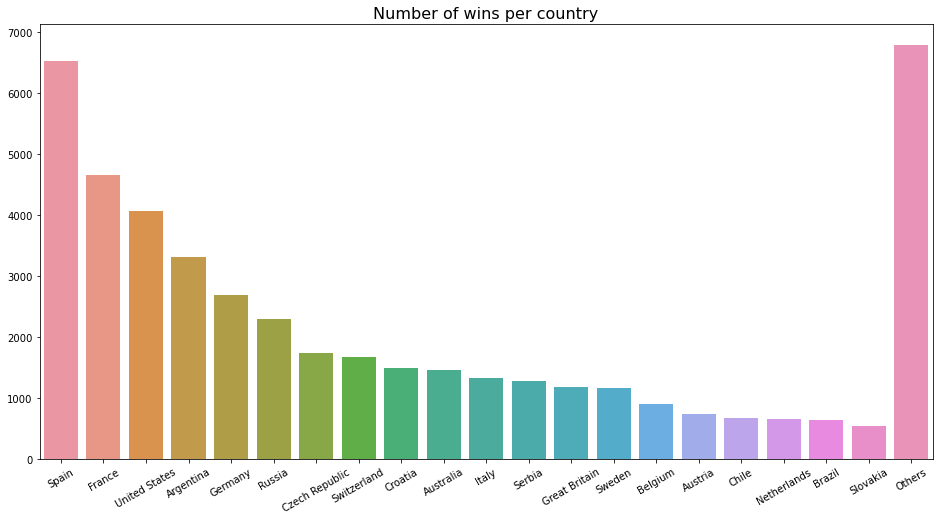

In [26]:
# Plotting the result

plt.figure(figsize = (16, 8))
fig = sns.barplot(x = top_countries.index, y = top_countries.values)
plt.title("Number of wins per country", fontsize = 16)
tick_labels = fig.set_xticklabels(top_countries.index, rotation = 30)
plt.show()

**Spain**, **France** and the **United States** are the three countries with the highest win count. However, we can see that there is still some competition: if the countries outside the top 20 are grouped together, their total remains higher than that of Spain.

#### Laterality of the winner

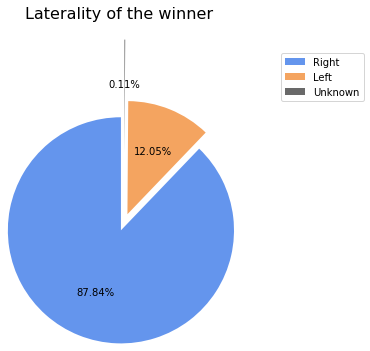

In [27]:
plt.pie(dataset["winner_hand"].value_counts(), 
        autopct = "%1.2f%%",
        colors = ["cornflowerblue", "sandybrown", "dimgrey"],
        startangle = 90,
        explode = (0.1, 0.1, 0.8),
        radius = 1.3)

plt.legend(["Right", "Left", "Unknown"], bbox_to_anchor = (1.2, 1.3))
plt.suptitle("Laterality of the winner", fontsize = 16, y = 1.25)

plt.show()

**Right-handed players** have won much more matches than left-handed players, however this is explained by the **imbalance between both lateralities in the world population**. There isn't any precise information on the actual number, but left-handed people are believed to represent around 15% of the world's population, so the proportion in our sample is similar to the one observed for the whole population.

#### Conclusion

As a conclusion to this exploratory part, we could sketch a **portrait of the player most likely to win a match**. This player would have to be (names and rankings set apart):

- **between 24 and 27 years old**
- around **185 cm tall**
- **right-handed**
- **Spanish** (French or American are alternatives)

Obviously, having these characteristics **isn't sufficient to pretend to win a professional match**. Let's not forget what we saw in our ranking analysis: unsurprisingly, your **rank** as a huge influence on your probability to win a match!

I'll finish with a simple remark that puts all these statistics into perspective. If we take the players with the highest win count in our dataset, namely **Roger Federer**, **Rafael Nadal** and **Novak Djokovic**, **none of them fulfils all the above criteria**: Federer is Swiss, Djokovic is Serbian and Nadal is left-handed...

### Machine Learning

Now that we've been able to make some interesting visualizations and to sketch a portrait of the player most likely to win a match, it's time to tackle the **machine learning part**. We will thus have a closer look at **match statistics**, and how they can help us predict the outcome of a match.

But as you may have already noticed, **we can't use the dataset in its current shape**. I'm not speaking about the statistics we have to rework, we aren't even there yet.

We are in a **supervised machine learning** situation, as we can train our model on data for which **we already know the answer**. If we materialize the latter (and we will later on), it will look like **a column containing 1 for a win and 0 for a loss**. The problem is that we have the winner and the loser of each match, thus **we can't currently create this new column**.

Indeed, if we put in this column the answer to the question "Did the winner win?", our column will be full of ones. Similarly, it will be full of zeros if the question is "Did the loser win?". We need to **redefine these two columns as player 1 and player 2**. Renaming the columns is of course not enough. We will have to **invert half of the dataset** so that for these lines, player 2 won against player 1.

Don't worry if this remains unclear for now, I'm pretty sure the code will help you understand. Once this work on the dataset will be done, we will be able to do some **feature engineering**. And then, we'll finally be ready for the machine learning itself!

#### Inverting part of the dataset

In [28]:
# First, let's create a new dataset with only the features we want to keep.
# That will ease the inversion process. We're keeping the names of the players 
# for now, as they will help us verify the process went well.

removed_col = ["year", "surface", "tournament_level", "winner_ioc", "loser_ioc", 
               "winner_country", "winner_hand", "winner_ht", "winner_age", "winner_rank",
               "loser_hand", "loser_ht", "loser_age", "loser_rank"]

stats_dataset = dataset.drop(removed_col, axis = 1)
stats_dataset.head()

,winner_name,loser_name,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Antony Dupuis,Andrew Ilie,8.0,1.0,126.0,76.0,56.0,29.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,4.0,4.0
1,Fernando Gonzalez,Cecil Mamiit,4.0,2.0,67.0,35.0,25.0,16.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,4.0,9.0
2,Paradorn Srichaphan,Sebastien Lareau,4.0,1.0,46.0,29.0,23.0,11.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,6.0,10.0
3,Jan Siemerink,Justin Gimelstob,8.0,6.0,109.0,56.0,43.0,21.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,6.0,11.0
4,Jason Stoltenberg,Alex Lopez Moron,3.0,0.0,50.0,27.0,22.0,16.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,3.0,6.0


In [29]:
# Splitting the dataset in two equal parts

# We first shuffle the dataset to make the data more heterogeneous, as it is originally 
# chronologically ordered. Moreover, this will help us maximizing the diversity of players 
# in both parts, as much of them didn't play during the whole period covered by our data.

shuffled_dataset = stats_dataset.sample(len(stats_dataset))

middle_index = int(len(stats_dataset) / 2)

# The "standard_dataset" won't know a lot of changes, while the "inverted_dataset" 
# will see the winner and the loser switch places.

standard_dataset = shuffled_dataset.iloc[:middle_index, :]
inverted_dataset = shuffled_dataset.iloc[middle_index:, :]

##### "Standard" half of the dataset

In [30]:
# Resetting the index

standard_dataset = standard_dataset.reset_index(drop = True)
standard_dataset.head()

,winner_name,loser_name,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Julian Knowle,Cecil Mamiit,0.0,4.0,54.0,28.0,24.0,17.0,0.0,0.0,1.0,0.0,46.0,25.0,19.0,10.0,0.0,3.0
1,Mikhail Youzhny,Dominik Hrbaty,5.0,3.0,50.0,29.0,22.0,13.0,2.0,2.0,1.0,4.0,47.0,13.0,9.0,15.0,3.0,7.0
2,Feliciano Lopez,Mikhail Youzhny,11.0,2.0,88.0,51.0,39.0,21.0,9.0,10.0,3.0,1.0,104.0,69.0,45.0,21.0,8.0,10.0
3,Ivan Dodig,Ivo Karlovic,10.0,7.0,132.0,85.0,71.0,33.0,2.0,3.0,48.0,6.0,152.0,106.0,85.0,25.0,5.0,8.0
4,Fabio Fognini,Jerzy Janowicz,5.0,2.0,50.0,24.0,18.0,13.0,4.0,6.0,1.0,5.0,51.0,27.0,13.0,9.0,5.0,11.0


In [31]:
# Renaming the columns of the "standard" part: "winner" 
# becomes "player 1" and "loser" becomes "player 2".

standard_dataset.columns = ["p1_name", "p2_name", "p1_ace", "p1_df", "p1_svpt", "p1_1stIn", 
                            "p1_1stWon", "p1_2ndWon", "p1_bpSaved", "p1_bpFaced", "p2_ace",
                            "p2_df", "p2_svpt", "p2_1stIn", "p2_1stWon", "p2_2ndWon",
                            "p2_bpSaved", "p2_bpFaced"]

In [32]:
# Adding the column that contains our target variable
# We will answer the question: "Did player 1 win?".
# As you can guess, for this sub-dataset the column will be full of ones.

standard_dataset["p1_won"] = 1
standard_dataset.head()

,p1_name,p2_name,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_bpSaved,p1_bpFaced,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_bpSaved,p2_bpFaced,p1_won
0,Julian Knowle,Cecil Mamiit,0.0,4.0,54.0,28.0,24.0,17.0,0.0,0.0,1.0,0.0,46.0,25.0,19.0,10.0,0.0,3.0,1
1,Mikhail Youzhny,Dominik Hrbaty,5.0,3.0,50.0,29.0,22.0,13.0,2.0,2.0,1.0,4.0,47.0,13.0,9.0,15.0,3.0,7.0,1
2,Feliciano Lopez,Mikhail Youzhny,11.0,2.0,88.0,51.0,39.0,21.0,9.0,10.0,3.0,1.0,104.0,69.0,45.0,21.0,8.0,10.0,1
3,Ivan Dodig,Ivo Karlovic,10.0,7.0,132.0,85.0,71.0,33.0,2.0,3.0,48.0,6.0,152.0,106.0,85.0,25.0,5.0,8.0,1
4,Fabio Fognini,Jerzy Janowicz,5.0,2.0,50.0,24.0,18.0,13.0,4.0,6.0,1.0,5.0,51.0,27.0,13.0,9.0,5.0,11.0,1


##### "Inverted" half of the dataset

In [33]:
# Resetting the index

inverted_dataset = inverted_dataset.reset_index(drop = True)
inverted_dataset.head()

,winner_name,loser_name,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_bpSaved,l_bpFaced
0,Davide Sanguinetti,Robert Kendrick,7.0,7.0,87.0,41.0,32.0,26.0,8.0,9.0,13.0,10.0,83.0,34.0,31.0,20.0,6.0,9.0
1,Marat Safin,Greg Rusedski,12.0,4.0,116.0,65.0,52.0,25.0,5.0,8.0,11.0,14.0,119.0,61.0,49.0,28.0,6.0,10.0
2,Gael Monfils,John Isner,11.0,4.0,74.0,53.0,43.0,12.0,2.0,3.0,12.0,0.0,99.0,69.0,46.0,18.0,8.0,10.0
3,Alberto Martin,Christophe Rochus,4.0,8.0,92.0,36.0,21.0,24.0,8.0,15.0,3.0,4.0,86.0,36.0,17.0,27.0,7.0,13.0
4,Andreas Seppi,Oscar Hernandez,6.0,2.0,53.0,33.0,32.0,13.0,1.0,1.0,5.0,1.0,82.0,55.0,34.0,13.0,5.0,7.0


In [34]:
# Renaming the columns of the "inverted" part: "winner" becomes "player 2" 
# and "loser" becomes "player 1". Why? Because this time we want 0 in our
# target variable column, so the loser has to be player 1.

inverted_dataset.columns = ["p2_name", "p1_name", "p2_ace", "p2_df", "p2_svpt", "p2_1stIn", 
                            "p2_1stWon", "p2_2ndWon", "p2_bpSaved", "p2_bpFaced", "p1_ace",
                            "p1_df", "p1_svpt", "p1_1stIn", "p1_1stWon", "p1_2ndWon",
                            "p1_bpSaved", "p1_bpFaced"]

In [35]:
# Now we just have to reorganize the order of the column to follow the one of the standard part.

inverted_dataset = inverted_dataset.reindex(columns = standard_dataset.columns)

In [36]:
# Once again, we create a column full of zeros as our target variable.

inverted_dataset["p1_won"] = 0
inverted_dataset.head()

,p1_name,p2_name,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_bpSaved,p1_bpFaced,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_bpSaved,p2_bpFaced,p1_won
0,Robert Kendrick,Davide Sanguinetti,13.0,10.0,83.0,34.0,31.0,20.0,6.0,9.0,7.0,7.0,87.0,41.0,32.0,26.0,8.0,9.0,0
1,Greg Rusedski,Marat Safin,11.0,14.0,119.0,61.0,49.0,28.0,6.0,10.0,12.0,4.0,116.0,65.0,52.0,25.0,5.0,8.0,0
2,John Isner,Gael Monfils,12.0,0.0,99.0,69.0,46.0,18.0,8.0,10.0,11.0,4.0,74.0,53.0,43.0,12.0,2.0,3.0,0
3,Christophe Rochus,Alberto Martin,3.0,4.0,86.0,36.0,17.0,27.0,7.0,13.0,4.0,8.0,92.0,36.0,21.0,24.0,8.0,15.0,0
4,Oscar Hernandez,Andreas Seppi,5.0,1.0,82.0,55.0,34.0,13.0,5.0,7.0,6.0,2.0,53.0,33.0,32.0,13.0,1.0,1.0,0


##### Getting the final version of the dataset

In [37]:
# Merging both parts

almost_ready_for_ml = pd.concat([standard_dataset, inverted_dataset], sort = False)

In [38]:
# Resetting the index and displaying the result

almost_ready_for_ml = almost_ready_for_ml.reset_index(drop = True)
almost_ready_for_ml.head()

,p1_name,p2_name,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_bpSaved,p1_bpFaced,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_bpSaved,p2_bpFaced,p1_won
0,Julian Knowle,Cecil Mamiit,0.0,4.0,54.0,28.0,24.0,17.0,0.0,0.0,1.0,0.0,46.0,25.0,19.0,10.0,0.0,3.0,1
1,Mikhail Youzhny,Dominik Hrbaty,5.0,3.0,50.0,29.0,22.0,13.0,2.0,2.0,1.0,4.0,47.0,13.0,9.0,15.0,3.0,7.0,1
2,Feliciano Lopez,Mikhail Youzhny,11.0,2.0,88.0,51.0,39.0,21.0,9.0,10.0,3.0,1.0,104.0,69.0,45.0,21.0,8.0,10.0,1
3,Ivan Dodig,Ivo Karlovic,10.0,7.0,132.0,85.0,71.0,33.0,2.0,3.0,48.0,6.0,152.0,106.0,85.0,25.0,5.0,8.0,1
4,Fabio Fognini,Jerzy Janowicz,5.0,2.0,50.0,24.0,18.0,13.0,4.0,6.0,1.0,5.0,51.0,27.0,13.0,9.0,5.0,11.0,1


#### Doing some feature engineering

There is one last step before training some machine learning models. Indeed, as stated previously, **some of the match statistics we want to feed our models with are unmeaningful in their current state**.

It could be interesting to **create some new features** that will make more sense than the current ones. Let's review the latter:
- **p1_ace**/**p2_ace**: number of aces (services unreturned) of the players, usable as it is.
- **p1_df**/**p2_df**: number of double faults (faults on service) of the players, same thing.
- **p1_svpt**/**p2_svpt**: number of service points played by the player, isn't really meaningful but will help us creating other features.
- **p1_1stIn**/**p2_1stIn**: number of services valid at the first attempt, we have to divide it by the number of service points played to get a percentage.
- **p1_1stWon**/**p2_1stWon**: number of points won after a service valid at the first attempt, again we have to transform it to a percentage through a division by the number of services valid at the first attempt.
- **p1_2ndWon**/**p2_2ndWon**: number of points won after a service valid at the second attempt, the percentage can be calculated using the number of service points and the number of services valid at the first attempt.
- **p1_bpSaved**/**p2_bpSaved** and **p1_bpFaced**/**p2_bpFaced**: respectively the number of break points (game points for the opponent on a player's serve) saved and faced by the players, will help us calculate the number of break points obtained and the number of breaks made. 

Let's calculate all this!

In [39]:
# Player 1's first serve percentage

almost_ready_for_ml["p1_1stIn%"] = 100 * (almost_ready_for_ml["p1_1stIn"] / almost_ready_for_ml["p1_svpt"])

# Percentage of points won after a successful first serve by player 1

almost_ready_for_ml["p1_1stWon%"] = 100 * (almost_ready_for_ml["p1_1stWon"] / almost_ready_for_ml["p1_1stIn"])

# Percentage of points won after a successful second serve by player 1

almost_ready_for_ml["p1_2ndWon%"] = 100 * (almost_ready_for_ml["p1_2ndWon"] / (almost_ready_for_ml["p1_svpt"] - almost_ready_for_ml["p1_1stIn"]))

# Player 1's percentage of points won on his serve

almost_ready_for_ml["p1_svptWon%"] = 100 * ((almost_ready_for_ml["p1_1stWon"] + almost_ready_for_ml["p1_2ndWon"]) / almost_ready_for_ml["p1_svpt"])

# Number of points won by player

almost_ready_for_ml["p1_ptsWon"] = almost_ready_for_ml["p1_1stWon"] + almost_ready_for_ml["p1_2ndWon"] + almost_ready_for_ml["p2_svpt"] - almost_ready_for_ml["p2_1stWon"] - almost_ready_for_ml["p2_2ndWon"]

# Number of break points obtained by player 1

almost_ready_for_ml["p1_bp"] = almost_ready_for_ml["p2_bpFaced"]

# Number of breaks made by player 1

almost_ready_for_ml["p1_breaks"] = almost_ready_for_ml["p2_bpFaced"] - almost_ready_for_ml["p2_bpSaved"]

# Calculating the exact same things for player 2

almost_ready_for_ml["p2_1stIn%"] = 100 * (almost_ready_for_ml["p2_1stIn"] / almost_ready_for_ml["p2_svpt"])
almost_ready_for_ml["p2_1stWon%"] = 100 * (almost_ready_for_ml["p2_1stWon"] / almost_ready_for_ml["p2_1stIn"])
almost_ready_for_ml["p2_2ndWon%"] = 100 * (almost_ready_for_ml["p2_2ndWon"] / (almost_ready_for_ml["p2_svpt"] - almost_ready_for_ml["p2_1stIn"]))
almost_ready_for_ml["p2_svptWon%"] = 100 * ((almost_ready_for_ml["p2_1stWon"] + almost_ready_for_ml["p2_2ndWon"]) / almost_ready_for_ml["p2_svpt"])
almost_ready_for_ml["p2_ptsWon"] = almost_ready_for_ml["p2_1stWon"] + almost_ready_for_ml["p2_2ndWon"] + almost_ready_for_ml["p1_svpt"] - almost_ready_for_ml["p1_1stWon"] - almost_ready_for_ml["p1_2ndWon"]
almost_ready_for_ml["p2_bp"] = almost_ready_for_ml["p1_bpFaced"]
almost_ready_for_ml["p2_breaks"] = almost_ready_for_ml["p1_bpFaced"] - almost_ready_for_ml["p1_bpSaved"]

# Displaying the result

almost_ready_for_ml.head()

,p1_name,p2_name,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_bpSaved,p1_bpFaced,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_bpSaved,p2_bpFaced,p1_won,p1_1stIn%,p1_1stWon%,p1_2ndWon%,p1_svptWon%,p1_ptsWon,p1_bp,p1_breaks,p2_1stIn%,p2_1stWon%,p2_2ndWon%,p2_svptWon%,p2_ptsWon,p2_bp,p2_breaks
0,Julian Knowle,Cecil Mamiit,0.0,4.0,54.0,28.0,24.0,17.0,0.0,0.0,1.0,0.0,46.0,25.0,19.0,10.0,0.0,3.0,1,51.851852,85.714286,65.384615,75.925926,58.0,3.0,3.0,54.347826,76.000000,47.619048,63.043478,42.0,0.0,0.0
1,Mikhail Youzhny,Dominik Hrbaty,5.0,3.0,50.0,29.0,22.0,13.0,2.0,2.0,1.0,4.0,47.0,13.0,9.0,15.0,3.0,7.0,1,58.000000,75.862069,61.904762,70.000000,58.0,7.0,4.0,27.659574,69.230769,44.117647,51.063830,39.0,2.0,0.0
2,Feliciano Lopez,Mikhail Youzhny,11.0,2.0,88.0,51.0,39.0,21.0,9.0,10.0,3.0,1.0,104.0,69.0,45.0,21.0,8.0,10.0,1,57.954545,76.470588,56.756757,68.181818,98.0,10.0,2.0,66.346154,65.217391,60.000000,63.461538,94.0,10.0,1.0
3,Ivan Dodig,Ivo Karlovic,10.0,7.0,132.0,85.0,71.0,33.0,2.0,3.0,48.0,6.0,152.0,106.0,85.0,25.0,5.0,8.0,1,64.393939,83.529412,70.212766,78.787879,146.0,8.0,3.0,69.736842,80.188679,54.347826,72.368421,138.0,3.0,1.0
4,Fabio Fognini,Jerzy Janowicz,5.0,2.0,50.0,24.0,18.0,13.0,4.0,6.0,1.0,5.0,51.0,27.0,13.0,9.0,5.0,11.0,1,48.000000,75.000000,50.000000,62.000000,60.0,11.0,6.0,52.941176,48.148148,37.500000,43.137255,41.0,6.0,2.0


Before moving on, we have to check if we have any **missing values** left.

In [40]:
almost_ready_for_ml.isnull().any().sum()

5

It's not that much, we can definitely **remove the corresponding lines**. We'll take advantage of this to also **remove the names of the players** in the dataframe: they helped us make sure the inverting process went well, but we don't need them anymore.

In [41]:
almost_ready_for_ml = almost_ready_for_ml.dropna(axis = 0).reset_index(drop = True)
ready_for_ml = almost_ready_for_ml.drop(["p1_name", "p2_name"], axis = 1)

#### Training and testing models

It's finally time for the **machine learning** itself! Which statistics do you think are the most significant on the outcome of a match? I definitely believe that the number of points won by a player is one of them.

Maybe you're wondering something at this point: **shouldn't we have calculated a ratio of points won or a difference between the total of points won by both players**? Indeed, winning 150 points seems nice, but you probably lost if 500 points were played. On the contrary, winning 60 points can sometimes be enough to win a game...

Actually, the **machine learning models will handle this** for us. Indeed, for each line, they will make their training and predictions taking into account **all the variables at once**. Therefore, a comparison of the statistics on both sides is implicitly made.

##### Preparing the data

In [42]:
# Splitting our data into X (containing our explanatory variables, i.e. the statistics)
# and y, which represents our target variable (if player 1 won the match or not)

X = ready_for_ml.loc[:, [col for col in ready_for_ml.columns if col != "p1_won"]]
y = ready_for_ml["p1_won"]

In [43]:
# Keeping the names of the columns in X before normalizing the data,
# as we will need them later on

explanatory_variables = X.columns

In [44]:
# Normalizing the data thanks to sklearn's StandardScaler method

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [45]:
# Splitting our data into a train and test set
# We take a test size of 20%.
# The 'stratify' argument ensures that the proportion of the modalities
# of our target variable will be kept in both the train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

##### Logistic regression

The first model we will try is a simple **logistic regression**.

In [46]:
# Instantiating the model and fitting it on our train set

logreg_classifier = LogisticRegression(max_iter = 150)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [47]:
# Evaluating the results

print("Train score: {}".format(logreg_classifier.score(X_train, y_train)))
print("Test score: {}".format(logreg_classifier.score(X_test, y_test)))

Train score: 0.9555991927125947
Test score: 0.9548380058906949


Both scores are close to 1, and close to each other. That means we have a **strong predictor**, without significant **overfitting**.

Let's display a **confusion matrix** in order to have a better understanding of our model's performance.

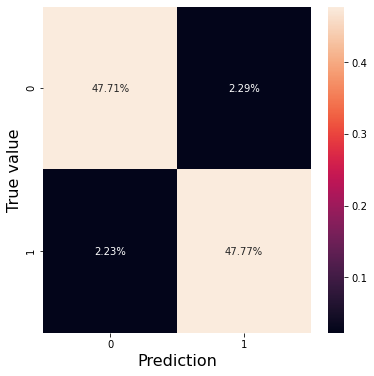

In [48]:
# Compiling the confusion matrix for the test set

cm = confusion_matrix(y_test, logreg_classifier.predict(X_test))

# Displaying it through Seaborn

plt.figure(figsize = (6, 6))
sns.heatmap(cm / np.sum(cm), annot = True, fmt = ".2%")
plt.ylabel("True value", fontsize = 16)
plt.xlabel("Prediction", fontsize = 16)
plt.show()

It seems our model is quite **consistent**, it doesn't struggle on a specific class.

We will now try to see **which features are the most important** in determining the prediction. Lucky for us, sklearn allows us to do so with only a few lines of code!

##### Features - Importance and Correlation

In [49]:
# Ranking the importance of each explanatory variable
# I chosed to put the absolute values of the coefficients, 
# as this will make comparisons easier to do.  

feature_importance = pd.DataFrame({"Features": explanatory_variables,
                                   "Values": abs(logreg_classifier.coef_.squeeze())})

feature_importance.sort_values(["Values"], ascending = False)

,Features,Values
20,p1_ptsWon,3.220784
27,p2_ptsWon,2.763834
12,p2_1stWon,2.196273
4,p1_1stWon,2.022230
26,p2_svptWon%,1.799957
19,p1_svptWon%,1.559766
13,p2_2ndWon,1.397795
5,p1_2ndWon,1.189572
29,p2_breaks,1.106160
22,p1_breaks,1.050546


This comes as no suprise, but the **main statistic** helping our model to decide which of the players won the match is the **number of points won by each of them**. The **number of points the latter won after a succesful first serve** follows closely. Then comes the **percentage of serve points won**, the **number of points won after a succesful second serve** and the **number of breaks made**. The other statistics seem less important.

However, I wonder if feeding our model with all these statistics is really efficient. Indeed, as we created some new statistics based on existing ones, we probably have **high correlations** in our dataframe, meaning that **a lot of variables carry the same information**. Let's verify this assumption.

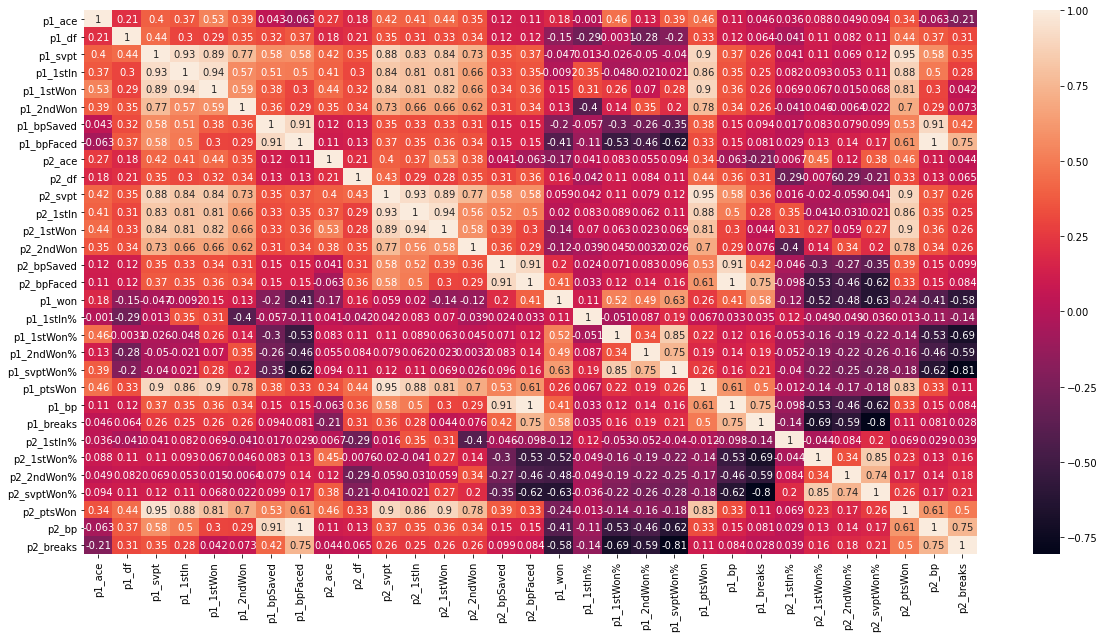

In [50]:
corr_matrix = ready_for_ml.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Considering that a correlation coefficient close to 1 or -1 implies a strong correlation, **we do have some correlations** in our dataset. This is not necessarily a huge problem, but it is always a **good practice** to get rid of a variable if it contains the same information as another.

Let's try to select only a few variables and see if this impacts the performances of our model. We will **remove the variables we considered unmeaningful without any transformation**, i.e. basically all the initial statistics except for the number of aces and double faults.

In [51]:
filtered_dataset = ready_for_ml.drop(["p1_svpt", "p2_svpt", "p1_1stIn", "p2_1stIn",
                                      "p1_1stWon", "p2_1stWon", "p1_2ndWon", "p2_2ndWon",
                                      "p1_bpSaved", "p2_bpSaved", "p1_bpFaced", "p2_bpFaced"], 
                                     axis = 1)
filtered_dataset.head()

,p1_ace,p1_df,p2_ace,p2_df,p1_won,p1_1stIn%,p1_1stWon%,p1_2ndWon%,p1_svptWon%,p1_ptsWon,p1_bp,p1_breaks,p2_1stIn%,p2_1stWon%,p2_2ndWon%,p2_svptWon%,p2_ptsWon,p2_bp,p2_breaks
0,0.0,4.0,1.0,0.0,1,51.851852,85.714286,65.384615,75.925926,58.0,3.0,3.0,54.347826,76.000000,47.619048,63.043478,42.0,0.0,0.0
1,5.0,3.0,1.0,4.0,1,58.000000,75.862069,61.904762,70.000000,58.0,7.0,4.0,27.659574,69.230769,44.117647,51.063830,39.0,2.0,0.0
2,11.0,2.0,3.0,1.0,1,57.954545,76.470588,56.756757,68.181818,98.0,10.0,2.0,66.346154,65.217391,60.000000,63.461538,94.0,10.0,1.0
3,10.0,7.0,48.0,6.0,1,64.393939,83.529412,70.212766,78.787879,146.0,8.0,3.0,69.736842,80.188679,54.347826,72.368421,138.0,3.0,1.0
4,5.0,2.0,1.0,5.0,1,48.000000,75.000000,50.000000,62.000000,60.0,11.0,6.0,52.941176,48.148148,37.500000,43.137255,41.0,6.0,2.0


Now, we just have to **reapply all the steps we implemented before**.

In [52]:
# Splitting our data into X and y

X = filtered_dataset.loc[:, [col for col in filtered_dataset.columns if col != "p1_won"]]
y = filtered_dataset["p1_won"]

# Keeping the names of the columns in X before normalizing the data

explanatory_variables = X.columns

# Normalizing the data

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

# Splitting our data into a train and test set

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

# Instantiating the model and fitting it on our train set

logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Evaluating the resuls

print("Train score: {}".format(logreg_classifier.score(X_train, y_train)))
print("Test score: {}".format(logreg_classifier.score(X_test, y_test)))

Train score: 0.9543991708940163
Test score: 0.956037962255918


Amazing, we almost got the **same results**, with much less variables!

You might think it wasn't worth doing all these changes. However, there is something I didn't mention earlier: having less variables also means **your model will train faster**. Here we used a logistic regression model on a small dataset, so the difference is harder to notice, but when using other models and/or working on bigger datasets this can you some tremendous amount of training time.

Let's check our feature importance table once again.

In [53]:
feature_importance = pd.DataFrame({"Features": explanatory_variables,
                                   "Values": abs(logreg_classifier.coef_.squeeze())})

feature_importance.sort_values(["Values"], ascending = False)

,Features,Values
8,p1_ptsWon,7.970431
15,p2_ptsWon,7.872978
10,p1_breaks,1.722202
17,p2_breaks,1.717981
7,p1_svptWon%,0.287823
12,p2_1stWon%,0.268384
9,p1_bp,0.205603
13,p2_2ndWon%,0.190564
16,p2_bp,0.102444
11,p2_1stIn%,0.078282


The **number of points won by each player has never been so important**. Once again, this comes as no surprise, even though as mentionned before the scoring system in tennis can lead to situations where the winner won less points than his opponent.

The **number of breaks** (games won on the opponent's serve) made by each player is now the second most important feature, which seems logical as well.

OK, now, what if we try **other classification models**?

##### Decision Tree/Random Forest

In [54]:
# Instantiating and fitting a Decision Tree

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Displaying the results

print("Train score: {}".format(dt_classifier.score(X_train, y_train)))
print("Test score: {}".format(dt_classifier.score(X_test, y_test)))

Train score: 0.9999727267768505
Test score: 0.9218937493182066


**Our train score significantly improved but our test score dropped**. We are in an **overfitting** situation, which often occurs with this type of model. Our model is able to identify almost perfectly the patterns in the train set, but it fits too closely to the latter and is thus less performant when facing unknown data (the test set).

A **Random Forest**, which is simply a collection of decision trees, might help alleviating this problem.

In [55]:
# Instantiating and fitting a Random Forest with 200 trees

rf_classifier = RandomForestClassifier(n_estimators = 200)
rf_classifier.fit(X_train, y_train)

# Displaying the results

print("Train score: {}".format(rf_classifier.score(X_train, y_train)))
print("Test score: {}".format(rf_classifier.score(X_test, y_test)))

Train score: 0.9999727267768505
Test score: 0.9456747027380823


That's better, but still not enough. Let's use a **grid search** in order to determine the **optimal parameters** for our model.

**__WARNING__**: depending on your execution environment, the grid search can take a lot of time to train. That's completely normal. This is where the **dimensionality reduction** we applied previously proves very useful!

In [56]:
# Instantiating the model

rf_classifier_init = RandomForestClassifier()

# Setting the different parameters we want to test

params = {"n_estimators": [100, 200, 300],
          "max_depth": [2, 6, 10],
          "min_samples_split": [2, 5, 10]}

# Instantiating and fitting the grid search

rf_grid_classifier = GridSearchCV(cv = 10, estimator = rf_classifier_init, param_grid = params)
rf_grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 6, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [57]:
# Checking which parameters gave the best results

rf_grid_classifier.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [58]:
# Displaying the results for the corresponding model

print("Train score: {}".format(rf_grid_classifier.best_estimator_.score(X_train, y_train)))
print("Test score: {}".format(rf_grid_classifier.best_estimator_.score(X_test, y_test)))

Train score: 0.9662902961872034
Test score: 0.9454565288534963


We **reduced the overfitting problem**, but it's still **slightly present**.

Could we do better with a **Support Vector Machine (SVM)** model?

##### Support Vector Machine (SVM)

In [59]:
# Instantiating and fitting the SVM model

svm_classifier = SVC(kernel = "rbf")
svm_classifier.fit(X_train, y_train)

SVC()

In [60]:
# Displaying the results

print("Train score: {}".format(svm_classifier.score(X_train, y_train)))
print("Test score: {}".format(svm_classifier.score(X_test, y_test)))

Train score: 0.9574537718867616
Test score: 0.9514563106796117


The results are really **similar to those obtained through a Random Forest**. Once again, let's try a **grid search** in order to see if we can improve the performances.

In [61]:
# Instantiating the model

svm_classifier_init = SVC(kernel = "rbf")

# Setting the different parameters we want to test

params = {"C": [1, 5, 10, 50],
          "gamma": [0.0001, 0.0005, 0.001, 0.005]}

# Instantiating and fitting the grid search

svm_grid_classifier = GridSearchCV(cv = 10, 
                                   estimator = svm_classifier_init, 
                                   param_grid = params, 
                                   verbose = 2, 
                                   n_jobs = -1)
svm_grid_classifier.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=2)

In [62]:
# Checking which parameters gave the best results

svm_grid_classifier.best_params_

{'C': 50, 'gamma': 0.005}

In [63]:
# Displaying the results for the corresponding model

print("Train score: {}".format(svm_grid_classifier.best_estimator_.score(X_train, y_train)))
print("Test score: {}".format(svm_grid_classifier.best_estimator_.score(X_test, y_test)))

Train score: 0.9586265204821905
Test score: 0.9541834842369369


The results are **similar to the ones obtained through a logistic regression model**, **without significant overfitting**!

We'll try a last model, namely a **Naive Bayes** model.

##### Naive Bayes

In [64]:
# Instantiating and fitting the model

nb_classifier = nb.GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [65]:
# Displaying the results

print("Train score: {}".format(nb_classifier.score(X_train, y_train)))
print("Test score: {}".format(nb_classifier.score(X_test, y_test)))

Train score: 0.9320351279114165
Test score: 0.9290934875095451


Not bad, but definitely **less performant** than the other models.

Overall, even though **all the models we tried performed well**, the **SVM** and **logistic regression** seem to be the **best options**. The Random Forest follows closely, with a better train score but a light overfitting, while the Naive Bayes model has proved to be a bit less efficient.

However, regardless of the model selected, there is one thing certain: **thanks to machine learning, you can predict the result of a tennis match thanks to its statistics with a great accuracy**.

### Conclusion

We have been through a lot of things in this project, haven't we?

The phase of **merging and cleaning the datasets** carried out **before this project** was not enough: the **data had to be cleaned** and **missing values had to be replaced**.

This allowed us to do a first step of **data exploration/visualization** on a good number of elements: age, ranking, height, laterality, nationality etc.

The result was a **typical portrait of the player with the best statistical chances of winning a match**. However, few winners actually meet all the criteria, far from it.

We were then able to move on to **machine learning**, with the idea of **trying to predict the outcome of a match from its statistics**. After a **feature engineering** stage aimed at making the base variables more meaningful, **several models were tested**: logistic regression, Decision Tree/Random Forest, SVM, Naive Bayes... All of them showed **good performances**, but the **logistic regression** and **SVM** models stood out.

**It is therefore possible to predict the outcome of a match fairly accurately**. Of course, this cannot be applied to sports betting, since predictions are made after the fact. However, it does give a **more accurate idea of the most important statistics in a match**! **Points won** (not surprisingly) and the **number of breaks** lead the way, and the results obtained before the selection of variables suggest that **success in serving** is also a determining factor.

If you know tennis, none of this will come as a big surprise, but **we now have facts to back up our assumptions**!